In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

We got equations: 
$$
\begin{cases}
\frac{dG}{dt} = p_1 G + p_2 I(t) + p_3 \\
I(t) = I_{max} / \cosh(a(t-t_1))
\end{cases}
$$

Let's first generate G

In [37]:
def getI(t, I_max, a=1, t1=10):
    return I_max / np.cosh(a * (t - t1))
    
def find_g(p1, p2, p3, p4, I_max, T, step=1):
    '''
    Modelat G with given parameters
    '''
    g = [p4]

    for t in range(int(T * step)):
        dg_dt = p1 * g[-1] + p2 * getI(t / step, I_max) + p3
        
        g.append(g[-1] + dg_dt / step)
        
    return np.array(g)

In [44]:
p1 = -1.44 / 10
p2 = 9.15 / 100
p3 = 11.3

I_max = 100
p4 = 150

In [60]:
step = 100
T = 60
G = find_g(p1, p2, p3, p4, I_max, T, step)
I = [getI(t / step, I_max) for t in range(int(T * step) + 1)]

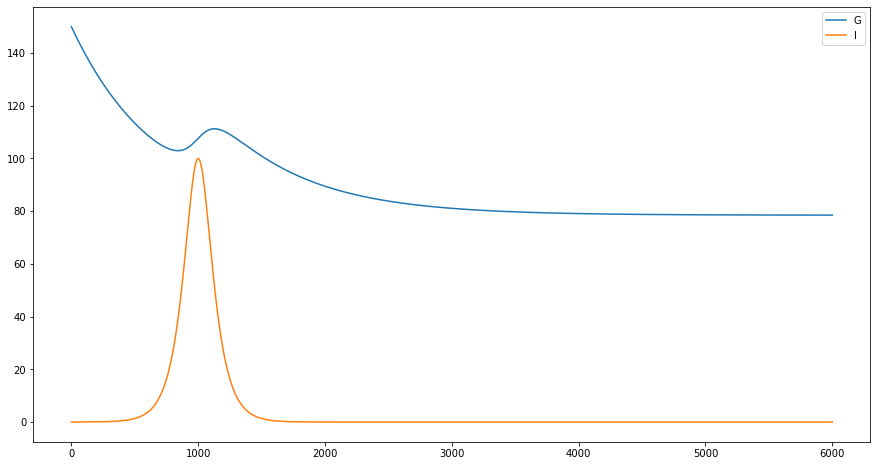

In [67]:
plt.figure(figsize=(15, 8))
plt.plot(G, label='G')
plt.plot(I, label='I')
plt.legend()

# This problem is observable:

In [63]:
Y = G[::step][1:] - G[::step][:-1]
X = np.vstack([G[::step][:-1], I[::step][:-1]]).T

In [66]:
model = LinearRegression().fit(X, Y)
y_pred = model.predict(X)
[p1_, p2_], p3_ = model.coef_, model.intercept_
           
print("R2 Score:", r2_score(y_pred, Y))
print("Predicted p_1:", p1_)
print("Predicted p_2:", p2_)
print("Predicted p_3:", p3_)

R2 Score: 0.9645273210120227
Predicted p_1: -0.13390752280066937
Predicted p_2: 0.08012919579882467
Predicted p_3: 10.531271960540122
